In [1]:
# Second method & Third method -- Detect and Remove Outliers
# 2. Three sigma method, 3. ZScore method.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.shape

(1000, 3)

In [5]:
df.sample(5) # Randam data show from my dataset

,cgpa,placement_exam_marks,placed
907,7.03,44.0,1
505,6.48,18.0,1
641,7.49,22.0,0
528,6.90,38.0,1
18,6.93,27.0,0


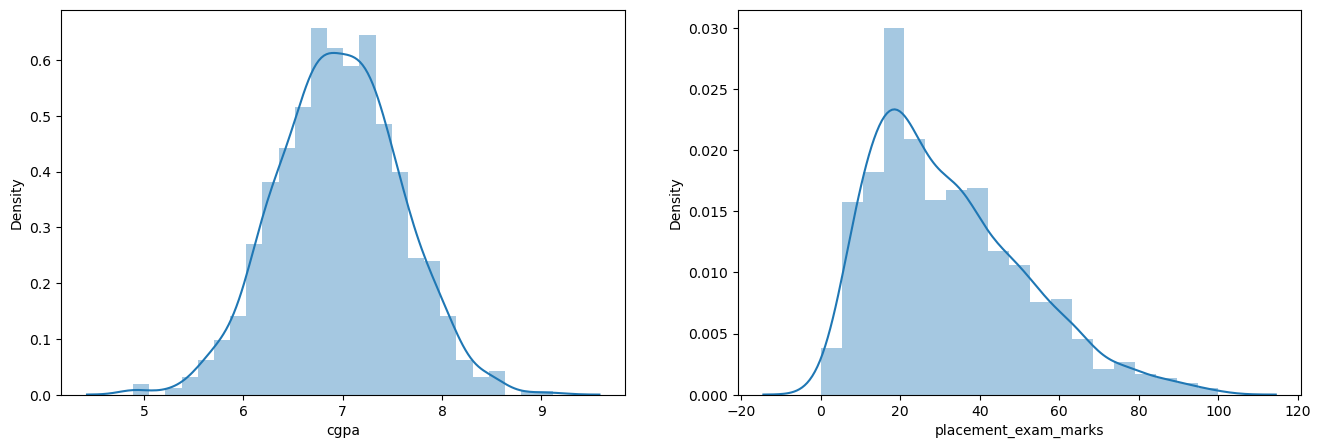

In [6]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

<Axes: ylabel='cgpa'>

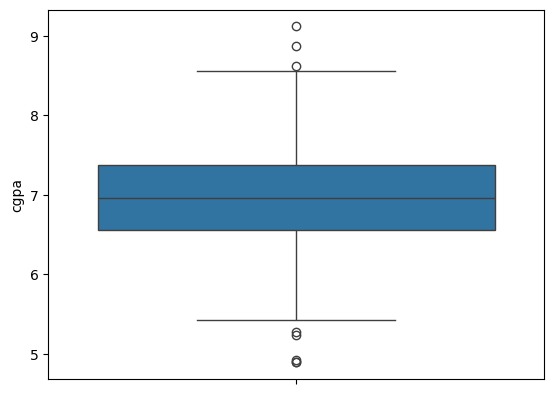

In [7]:
# for cgpa column ---
sns.boxplot(df['cgpa'])

In [8]:
# Finding the boundary values
print('Highest allowed', df['cgpa'].mean() + 3 * df['cgpa'].std())
print('Lowest allowed', df['cgpa'].mean() - 3 * df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [9]:
# Finding outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [13]:
# Trimming
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


<Axes: ylabel='cgpa'>

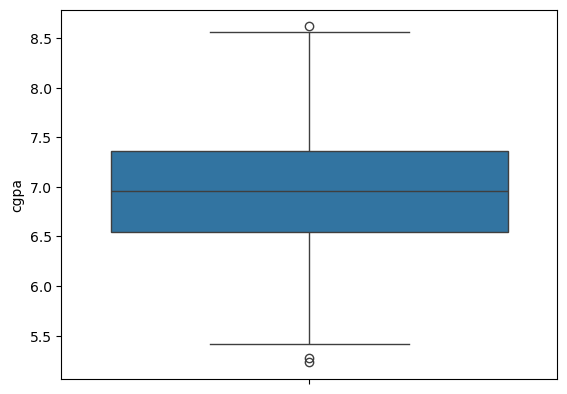

In [14]:
sns.boxplot(new_df['cgpa'])

<Axes: ylabel='placement_exam_marks'>

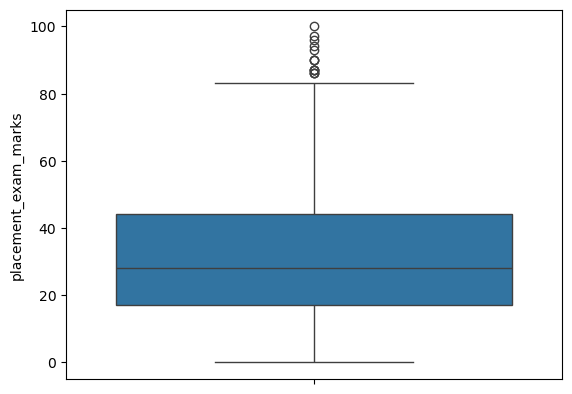

In [15]:
# for placement_exam_marks column ---
sns.boxplot(df['placement_exam_marks'])

In [16]:
# Finding the boundary values
print('Highest allowed', df['placement_exam_marks'].mean() + 3 * df['placement_exam_marks'].std())
print('Lowest allowed', df['placement_exam_marks'].mean() - 3 * df['placement_exam_marks'].std())

Highest allowed 89.61746701676324
Lowest allowed -25.167467016763247


In [20]:
# Finding outliers
df[(df['placement_exam_marks'] >  89.61) | (df['placement_exam_marks'] < 25.16)]

,cgpa,placement_exam_marks,placed
3,6.42,8.0,1
4,7.23,17.0,0
5,7.30,23.0,1
6,6.69,11.0,0
9,7.75,94.0,1
...,...,...,...
984,6.89,16.0,1
986,7.09,19.0,1
992,6.26,12.0,0
993,6.73,21.0,1


In [21]:
# Trimming
new_df = df[(df['placement_exam_marks'] <  89.61) & (df['placement_exam_marks'] > 25.16)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
7,7.12,39.0,1
8,6.45,38.0,0
...,...,...,...
994,6.48,63.0,0
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0


<Axes: ylabel='placement_exam_marks'>

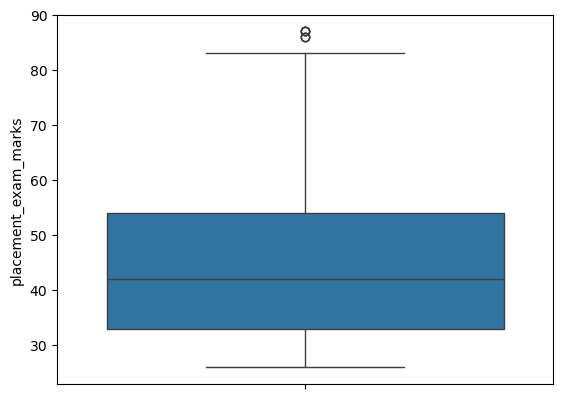

In [22]:
sns.boxplot(new_df['placement_exam_marks'])

In [ ]:
# ----------------------------------------------
# ---------------------------------------------
# ----------------------------------------------
# ----------------------------------------------
# ---------------------------------------------
# ----------------------------------------------
# ----------------------------------------------
# ---------------------------------------------
# ----------------------------------------------
# ----------------------------------------------
# ---------------------------------------------
# ----------------------------------------------
# ----------------------------------------------
# ---------------------------------------------
# ----------------------------------------------

In [ ]:
# # Third method -- Detect and Remove Outliers
# Z-Scores method

In [25]:
df = pd.read_csv('placement.csv')
df.head()

In [34]:
df.shape

(1000, 3)

In [27]:
df = df[['cgpa', "placement_exam_marks"]]

In [28]:
df

,cgpa,placement_exam_marks
0,7.19,26.0
1,7.46,38.0
2,7.54,40.0
3,6.42,8.0
4,7.23,17.0
...,...,...
995,8.87,44.0
996,9.12,65.0
997,4.89,34.0
998,8.62,46.0


In [29]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std() # It's a formula of Z-Score (Z = (x - u)/sigma)
# here, x = df['cgpa'], u = df['cgpa'].mean(), sigma = df['cgpa'].std() 

In [30]:
df

,cgpa,placement_exam_marks,cgpa_zscore
0,7.19,26.0,0.371425
1,7.46,38.0,0.809810
2,7.54,40.0,0.939701
3,6.42,8.0,-0.878782
4,7.23,17.0,0.436371
...,...,...,...
995,8.87,44.0,3.099150
996,9.12,65.0,3.505062
997,4.89,34.0,-3.362960
998,8.62,46.0,2.693239


In [31]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,cgpa_zscore
485,4.92,44.0,-3.314251
997,4.89,34.0,-3.362960
999,4.90,10.0,-3.346724


In [32]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,cgpa_zscore
995,8.87,44.0,3.099150
996,9.12,65.0,3.505062


In [1]:
df.shape

NameError: name 'df' is not defined

In [33]:
df1 = df[(df['cgpa_zscore'] > -3) & (df['cgpa_zscore'] < 3)]
df1.shape

(995, 3)

In [ ]:
# Again read file for best method "ZScore"

In [35]:
df1 = pd.read_csv('placement.csv')
df1.head(3)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1


In [36]:
df1 = df1[['cgpa', 'placement_exam_marks']]
df1

,cgpa,placement_exam_marks
0,7.19,26.0
1,7.46,38.0
2,7.54,40.0
3,6.42,8.0
4,7.23,17.0
...,...,...
995,8.87,44.0
996,9.12,65.0
997,4.89,34.0
998,8.62,46.0


In [37]:
# Important for remove outliers -- It's only three line of code 
# use scipy.stats and import zscore and next two lines.
from scipy.stats import zscore

In [38]:
z = np.abs(zscore(df1))
df2 = df1[(z<3).all(axis = 1)] # axis = 1 means Column wise

In [39]:
df2.shape

(987, 2)